In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go

In [304]:
df_cate = pd.read_csv('categories.csv', index_col=False)
df_cust = pd.read_csv('customers.csv',index_col=False)
df_employ = pd.read_csv('employees.csv', index_col=False)
df_ord = pd.read_csv('orders.csv', index_col= False)
df_orddet= pd.read_csv('orderdetails.csv',index_col= False)
df_prod = pd.read_csv('products.csv',index_col= False)
df_ship = pd.read_csv('shippers.csv',index_col= False)

## 1 Introduction to the Database

#### Time Frame of the database

In [305]:
Product_join = pd.merge(df_cate,df_prod, on='categoryid',how='left')
sales_df = pd.merge(df_orddet, Product_join, on='productid')
sales_df_detail = pd.merge(sales_df, df_ord, on='orderid')
sales_df_detail['sales'] = sales_df_detail['unitprice_x']*sales_df_detail['quantity']
customer_info = pd.merge(sales_df_detail, df_cust, on='customerid')
sales_df_detail['orderdate'] = pd.to_datetime(sales_df_detail['orderdate'], format='%Y-%m-%d')
sales_df_detail['requireddate'] = pd.to_datetime(sales_df_detail['requireddate'], format='%Y-%m-%d')
sales_df_detail['shippeddate'] = pd.to_datetime(sales_df_detail['shippeddate'], format='%Y-%m-%d')
sales_df_detail['orderyear'] = sales_df_detail['shippeddate'].dt.year
sales_df_detail['ordermonth'] = sales_df_detail['shippeddate'].dt.month

                                                            
sales_df_detail.size

71115

In [306]:
sales_df_detail['orderdate'].isnull().sum()

0

In [307]:
sales_df_detail['requireddate'].isnull().sum()

0

In [308]:
sales_df_detail['shippeddate'].isnull().sum()

73

In [309]:
print('Data Timeline:', sales_df_detail['requireddate'].min(), 'to', sales_df_detail['requireddate'].max())

Data Timeline: 1996-07-24 00:00:00 to 1998-06-11 00:00:00


#### Product Categories Type and Description

In [310]:
df_cate[['categoryid','categoryname','description']]

,categoryid,categoryname,description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


#### All listing Products and Description

In [318]:
pd.set_option('display.max_rows',15)

In [319]:
sales_df_detail

,orderid,productid,unitprice_x,quantity,discount,categoryid,categoryname,description,picture,productname,...,freight,ship_name,shipaddress,shipcity,shipregion,shippostalcode,shipcountry,sales,orderyear,ordermonth
0,10248,11,14.00,12,0.0,4,Dairy Products,Cheeses,binary data,Queso Cabrales,...,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,168.0,1996.0,7.0
1,10248,42,9.80,10,0.0,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",binary data,Singaporean Hokkien Fried Mee,...,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,98.0,1996.0,7.0
2,10248,72,34.80,5,0.0,4,Dairy Products,Cheeses,binary data,Mozzarella di Giovanni,...,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,174.0,1996.0,7.0
3,10296,11,16.80,12,0.0,4,Dairy Products,Cheeses,binary data,Queso Cabrales,...,0.12,LILA-Supermercado,Carrera 52 con Ave. Bolívar #65-98 Llano Largo,Barquisimeto,Lara,3508,Venezuela,201.6,1996.0,9.0
4,10296,16,13.90,30,0.0,3,Confections,"Desserts, candies, and sweet breads",binary data,Pavlova,...,0.12,LILA-Supermercado,Carrera 52 con Ave. Bolívar #65-98 Llano Largo,Barquisimeto,Lara,3508,Venezuela,417.0,1996.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,10585,47,9.50,15,0.0,3,Confections,"Desserts, candies, and sweet breads",binary data,Zaanse koeken,...,13.41,Wellington Importadora,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil,142.5,1997.0,7.0
2151,10699,47,9.50,12,0.0,3,Confections,"Desserts, candies, and sweet breads",binary data,Zaanse koeken,...,0.58,Morgenstern Gesundkost,Heerstr. 22,Leipzig,NaN,04179,Germany,114.0,1997.0,10.0
2152,10674,23,9.00,5,0.0,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",binary data,Tunnbröd,...,0.90,Island Trading,Garden House Crowther Way,Cowes,Isle of Wight,PO31 7PJ,UK,45.0,1997.0,9.0
2153,10920,50,16.25,24,0.0,3,Confections,"Desserts, candies, and sweet breads",binary data,Valkoinen suklaa,...,29.61,Around the Horn,Brook Farm Stratford St. Mary,Colchester,Essex,CO7 6JX,UK,390.0,1998.0,3.0


#### Products Count by Category Type (and in %)

In [134]:
Product_type_count = Product_join.groupby(['categoryid','categoryname']).count()['productname'].sort_values(ascending=False)
Product_type_count

categoryid  categoryname  
3           Confections       13
1           Beverages         12
2           Condiments        12
8           Seafood           12
4           Dairy Products    10
5           Grains/Cereals     7
6           Meat/Poultry       6
7           Produce            5
Name: productname, dtype: int64

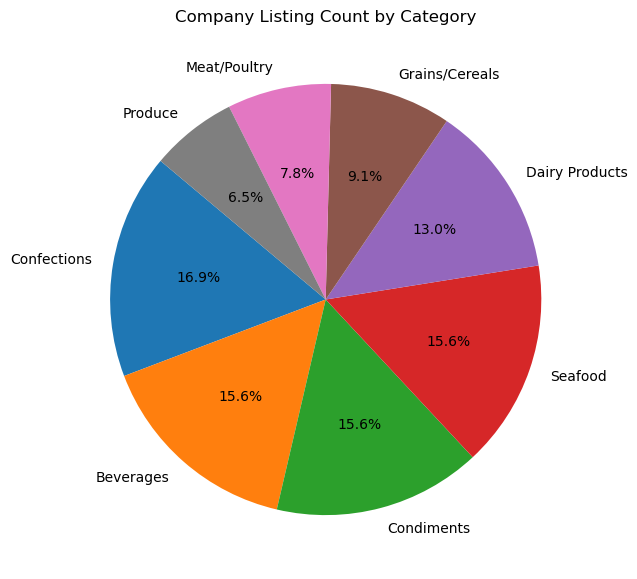

In [293]:
# Data for company listing count by category
categories = ["Confections", "Beverages", "Condiments", "Seafood", "Dairy Products", "Grains/Cereals", "Meat/Poultry", "Produce"]
counts = [13, 12, 12, 12, 10, 7, 6, 5]

# Creating a pie chart
plt.figure(figsize=(10, 7))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Company Listing Count by Category')
plt.show()


In [135]:
Product_type_rank = round(Product_type_count.sort_values(ascending=False)/sum(Product_type_count),2)
Product_type_rank

categoryid  categoryname  
3           Confections       0.17
1           Beverages         0.16
2           Condiments        0.16
8           Seafood           0.16
4           Dairy Products    0.13
5           Grains/Cereals    0.09
6           Meat/Poultry      0.08
7           Produce           0.06
Name: productname, dtype: float64

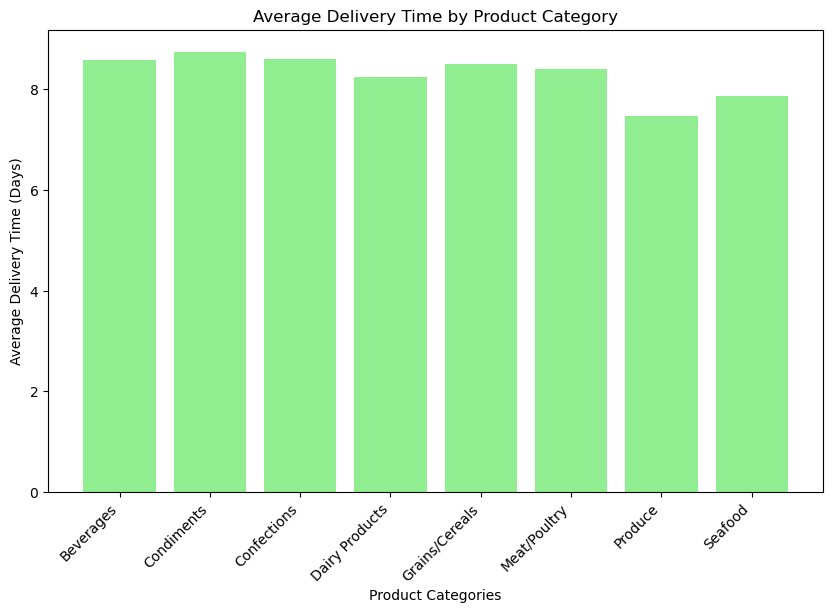

In [284]:
category_names = [
    "Beverages", "Condiments", "Confections", "Dairy Products",
    "Grains/Cereals", "Meat/Poultry", "Produce", "Seafood"
]
average_delivery_times = [8.583548, 8.743961, 8.611111, 8.250704, 8.497382, 8.396450, 7.460938, 7.868339]

# Create the bar chart for average delivery times
plt.figure(figsize=(10, 6))
plt.bar(category_names, average_delivery_times, color='lightgreen')
plt.xlabel('Product Categories')
plt.ylabel('Average Delivery Time (Days)')
plt.title('Average Delivery Time by Product Category')
plt.xticks(rotation=45, ha='right')  # Rotate category names for better visibility

# Display the bar chart
plt.show()

#### Inventory Level, Reorderstock Level (Across all products, by categories)

#### inventory level

In [136]:
round(sales_df_detail['reorderlevel'].mean(),2)

11.9

In [137]:
round(sales_df_detail.groupby(['categoryid','categoryname']).mean(numeric_only=True)['reorderlevel'],2).sort_values(ascending=False)

categoryid  categoryname  
5           Grains/Cereals    22.63
1           Beverages         16.62
8           Seafood           11.48
2           Condiments        11.13
4           Dairy Products     9.95
3           Confections        8.67
6           Meat/Poultry       5.90
7           Produce            5.48
Name: reorderlevel, dtype: float64

#### Reorderstock Level

In [138]:
round(sales_df_detail['unitsinstock'].mean(),2)

39.8

In [139]:
round(sales_df_detail.groupby(['categoryid','categoryname']).mean(numeric_only=True)['unitsinstock'],2).sort_values(ascending=False)

categoryid  categoryname  
8           Seafood           64.18
2           Condiments        48.22
1           Beverages         44.83
4           Dairy Products    36.68
5           Grains/Cereals    36.20
6           Meat/Poultry      27.14
3           Confections       23.78
7           Produce           21.29
Name: unitsinstock, dtype: float64

#### Delievery Time

In [140]:
sales_df_detail['deliverytime'] = sales_df_detail['shippeddate'] - sales_df_detail['orderdate'] 
sales_df_detail['deliverytime'] = sales_df_detail['deliverytime'].dt.days
sales_df_detail['deliverytime']

0       12.0
1       12.0
2       12.0
3        8.0
4        8.0
        ... 
2150     9.0
2151     4.0
2152    12.0
2153     6.0
2154     6.0
Name: deliverytime, Length: 2155, dtype: float64

In [141]:
sales_df_detail.groupby(['categoryid','categoryname']).mean(numeric_only = True)['deliverytime']

categoryid  categoryname  
1           Beverages         8.583548
2           Condiments        8.743961
3           Confections       8.611111
4           Dairy Products    8.250704
5           Grains/Cereals    8.497382
6           Meat/Poultry      8.396450
7           Produce           7.460938
8           Seafood           7.868339
Name: deliverytime, dtype: float64

#### Customer Information

In [142]:
customer_info_unique = customer_info.drop_duplicates(subset=['customerid', 'country'])
customer_info_unique['companyname'].isnull().sum()

0

##### Company Business Model: B2B Groceries Distributor

In [143]:
customer_info_unique['companyname'].size

89

In [144]:
customer_info_unique.groupby('country').count()['customerid'].sort_values(ascending=False)

country
USA            13
Germany        11
France         10
Brazil          9
UK              7
               ..
Switzerland     2
Belgium         2
Ireland         1
Norway          1
Poland          1
Name: customerid, Length: 21, dtype: int64

In [276]:
pd.set_option('display.max_rows', None)

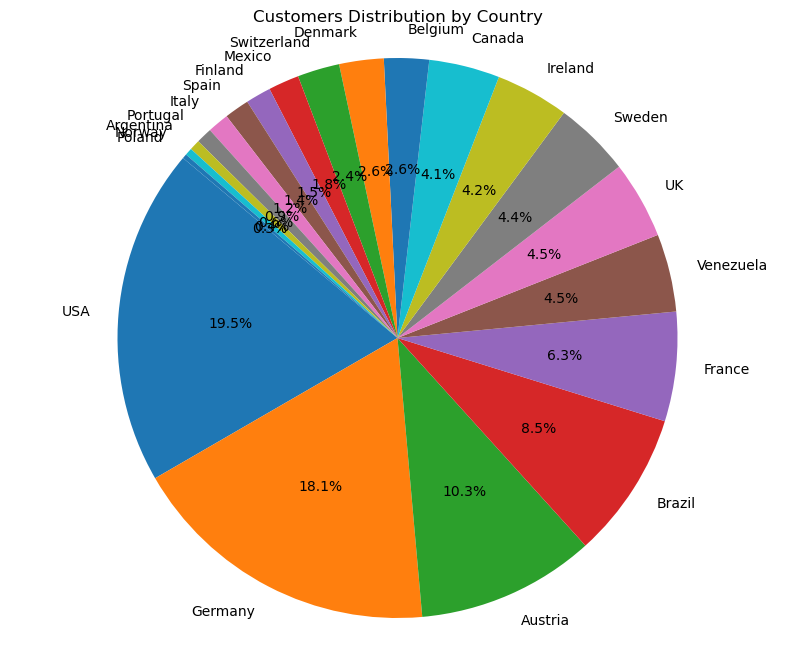

In [283]:
import matplotlib.pyplot as plt

# Data for pie chart
countries = [
    "USA", "Germany", "Austria", "Brazil", "France", "Venezuela",
    "UK", "Sweden", "Ireland", "Canada", "Belgium", "Denmark",
    "Switzerland", "Mexico", "Finland", "Spain", "Italy", "Portugal",
    "Argentina", "Norway", "Poland"
]
sales = [
    263566.98, 244640.63, 139496.63, 114968.48, 85498.76, 60814.89,
    60616.51, 59523.70, 57317.39, 55334.10, 35134.98, 34782.25,
    32919.50, 24073.45, 19778.45, 19431.89, 16705.15, 12468.65,
    8119.10, 5735.15, 3531.95
]

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(sales, labels=countries, autopct='%1.1f%%', startangle=140)
plt.title('Customers Distribution by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()


In [277]:
customer_info.groupby('country').sum(numeric_only=True)['sales'].sort_values(ascending=False)

country
USA            263566.98
Germany        244640.63
Austria        139496.63
Brazil         114968.48
France          85498.76
Venezuela       60814.89
UK              60616.51
Sweden          59523.70
Ireland         57317.39
Canada          55334.10
Belgium         35134.98
Denmark         34782.25
Switzerland     32919.50
Mexico          24073.45
Finland         19778.45
Spain           19431.89
Italy           16705.15
Portugal        12468.65
Argentina        8119.10
Norway           5735.15
Poland           3531.95
Name: sales, dtype: float64

In [146]:
customer_info['sales'].sum()

1354458.5899999999

## 2 Potential Bias

#### a. Quantityperunit - Different package size / weight in product listings might failure to assess the actual sales price 

In [147]:
pd.set_option('display.max_rows', 15)
pd.pivot_table(data=sales_df, values='orderid',index='quantityperunit',columns='categoryname',aggfunc='count')

categoryname,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
quantityperunit,,,,,,,,
1 kg pkg.,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN
10 - 200 g glasses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0
10 - 4 oz boxes,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
10 - 500 g pkgs.,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN
10 boxes x 12 pieces,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
50 - 300 g pkgs.,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN
50 bags x 30 sausgs.,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN
500 g,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN


#### b. unitprice from Products and Orders table are not equal

In [148]:
sales_test = sales_df[['productid','categoryid','supplierid','discount','quantity','unitprice_x','unitprice_y']]
test_1_pass = 0
test_1_total = 0
test_1_null = 0
for index, row in sales_test.iterrows():
    test_1_total += 1
    if pd.isnull(row['unitprice_x']) or pd.isnull(row['unitprice_y']):
        test_1_null += 1
    elif row['unitprice_x'] == row['unitprice_y']:
        test_1_pass += 1
test_1_total

2155

In [149]:
print('There are', test_1_pass,'equal prices,',test_1_null,'null value. and there are',round((test_1_total-test_1_pass)/test_1_total,2), 'of orders are not equal.')

There are 1493 equal prices, 0 null value. and there are 0.31 of orders are not equal.


#### Recognize if price are 1) higher than 'product' unitprice 2) follows with Discount, 3) unmatched discount: lower price, 4) unmatched discount: higher price and lower than unitprice , 5) same price - invalid discount

In [150]:
Higher_pricing = 0
Follows_discount = 0
Unmatched_discount_lower = 0
unmatched_discount_higher = 0
invalid_discount = 0

for index, row in sales_test.iterrows():
    if row['unitprice_x'] > row['unitprice_y']:
        Higher_pricing +=1
    elif row['unitprice_x']/(1 - row['discount']) == row['unitprice_y']:
        Follows_discount +=1
    elif row['unitprice_x']<row['unitprice_y']*row['discount']:
        Unmatched_discount_lower += 1
    elif row['unitprice_x']>row['unitprice_y']*row['discount'] and row['unitprice_x'] < row['unitprice_y']:
        unmatched_discount_higher += 1
    if row['unitprice_x'] == row['unitprice_y'] and row['discount']>0:
        invalid_discount += 1
            

In [151]:
print('1) higher than Product unitprice: ', Higher_pricing)

1) higher than Product unitprice:  4


In [152]:
print('2) follows with Discount :', Follows_discount)

2) follows with Discount : 939


In [153]:
print('3) unmatched discount: lower than discounted price:', Unmatched_discount_lower)

3) unmatched discount: lower than discounted price: 0


In [154]:
print('4) unmatched discount: higher than discoutned price and lower than benchmark :',unmatched_discount_higher)

4) unmatched discount: higher than discoutned price and lower than benchmark : 632


In [155]:
print('5) same price - invalid discount: ',invalid_discount)

5) same price - invalid discount:  580


In [156]:
Test_sum =Higher_pricing+Follows_discount+Unmatched_discount_lower+unmatched_discount_higher+invalid_discount

if Test_sum == test_1_total:
    print ('The sum of test is valid')
else:
    print('The sum of test is invalid')

The sum of test is valid


# --------------------------

## 3 EDA on Sales Performances

### a. Sales(from Orders): by Category, the Top 10 listing and the Worst 10 Listing

##### 1) unitprice by category rank

In [298]:
round(sales_df.groupby(['categoryid','categoryname']).mean(numeric_only=True)['unitprice_x'].sort_values(ascending=False),2)

categoryid  categoryname  
6           Meat/Poultry      42.87
7           Produce           35.19
1           Beverages         29.24
4           Dairy Products    26.98
3           Confections       22.60
2           Condiments        21.32
5           Grains/Cereals    21.25
8           Seafood           19.06
Name: unitprice_x, dtype: float64

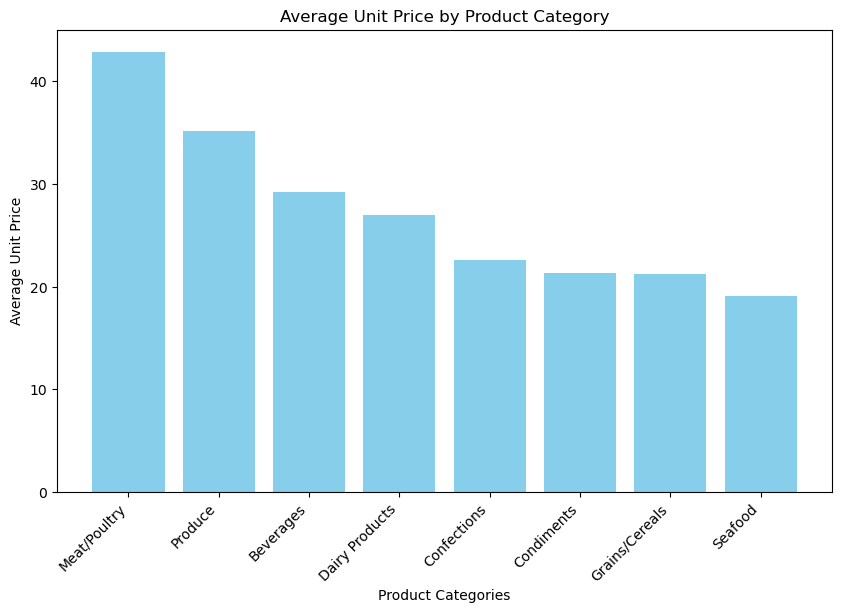

In [299]:
# Adjusting the request to create a bar chart instead of a pie chart to compare the unit prices across 8 product categories.

# Set up the data for the bar chart
categories = [
    "Meat/Poultry", "Produce", "Beverages", "Dairy Products",
    "Confections", "Condiments", "Grains/Cereals", "Seafood"
]
unit_prices = [42.87, 35.19, 29.24, 26.98, 22.60, 21.32, 21.25, 19.06]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, unit_prices, color='skyblue')
plt.xlabel('Product Categories')
plt.ylabel('Average Unit Price')
plt.title('Average Unit Price by Product Category')
plt.xticks(rotation=45, ha='right')  # Rotate category names for better visibility

# Display the bar chart
plt.show()



##### 2) order quantity by category rank

In [300]:
sales_df.groupby(['categoryid','categoryname']).sum(numeric_only=True)['quantity'].sort_values(ascending=False)

categoryid  categoryname  
1           Beverages         9532
4           Dairy Products    9149
3           Confections       7906
8           Seafood           7681
2           Condiments        5298
5           Grains/Cereals    4562
6           Meat/Poultry      4199
7           Produce           2990
Name: quantity, dtype: int64

In [301]:
sales_df_detail.groupby(['categoryid','categoryname']).sum(numeric_only=True)['Sales'].sort_values(ascending=False)

categoryid  categoryname  
1           Beverages         286526.95
4           Dairy Products    251330.50
6           Meat/Poultry      178188.80
3           Confections       177099.10
8           Seafood           141623.09
2           Condiments        113694.75
7           Produce           105268.60
5           Grains/Cereals    100726.80
Name: Sales, dtype: float64

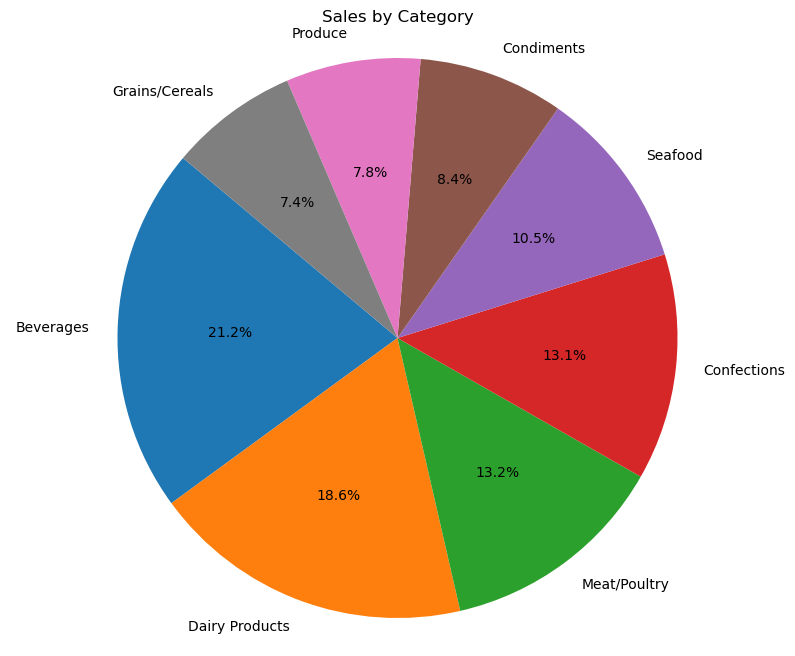

In [290]:
# Sales data by category
categories = [
    "Beverages", "Dairy Products", "Meat/Poultry", "Confections",
    "Seafood", "Condiments", "Produce", "Grains/Cereals"
]
sales_by_category = [
    286526.95, 251330.50, 178188.80, 177099.10,
    141623.09, 113694.75, 105268.60, 100726.80
]

# Create the pie chart for sales by category
plt.figure(figsize=(10, 8))
plt.pie(sales_by_category, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Sales by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()


##### 3) Top 10 Listings by Sales

In [160]:
sales_df_detail['Sales'] = sales_df_detail['unitprice_x']*sales_df_detail['quantity']

In [289]:
top_10_sales_sum = sales_df_detail.groupby(['productid','productname','categoryname']).sum(numeric_only=True)['Sales'].sort_values(ascending=False)
top_10_sales_sum.head(10)

productid  productname              categoryname  
38         Côte de Blaye            Beverages         149984.2
29         Thüringer Rostbratwurst  Meat/Poultry       87736.4
59         Raclette Courdavault     Dairy Products     76296.0
60         Camembert Pierrot        Dairy Products     50286.0
62         Tarte au sucre           Confections        49827.9
56         Gnocchi di nonna Alice   Grains/Cereals     45121.2
51         Manjimup Dried Apples    Produce            44742.6
17         Alice Mutton             Meat/Poultry       35482.2
18         Carnarvon Tigers         Seafood            31987.5
28         Rössle Sauerkraut        Produce            26865.6
Name: Sales, dtype: float64

##### 4) Worst 10 listings by Sales

In [162]:
top_10_sales_sum = sales_df_detail.groupby(['productid','productname','categoryname']).sum(numeric_only=True)['Sales'].sort_values(ascending=True)
top_10_sales_sum

productid  productname                categoryname  
48         Chocolade                  Confections         1542.75
33         Geitost                    Dairy Products      1713.50
15         Genen Shouyu               Condiments          1813.50
67         Laughing Lumberjack Lager  Beverages           2562.00
74         Longlife Tofu              Produce             2566.00
                                                          ...    
62         Tarte au sucre             Confections        49827.90
60         Camembert Pierrot          Dairy Products     50286.00
59         Raclette Courdavault       Dairy Products     76296.00
29         Thüringer Rostbratwurst    Meat/Poultry       87736.40
38         Côte de Blaye              Beverages         149984.20
Name: Sales, Length: 77, dtype: float64

##### 5) Top 3 Categories by Best 10 Selling Countries

In [349]:
customer_info['country']

0       France
1       France
2       France
3       France
4       France
         ...  
2150       USA
2151       USA
2152       USA
2153       USA
2154       USA
Name: country, Length: 2155, dtype: object

In [348]:
Top_10_Countries = customer_info.groupby('country').sum(numeric_only=True)['sales'].sort_values(ascending=False).head(10)
Top_10_Countries

country
USA          263566.98
Germany      244640.63
Austria      139496.63
Brazil       114968.48
France        85498.76
Venezuela     60814.89
UK            60616.51
Sweden        59523.70
Ireland       57317.39
Canada        55334.10
Name: sales, dtype: float64

In [351]:
customer_info_top10 = customer_info[customer_info['country'].isin(Top_10_Countries.index)]

In [389]:
category_sales = pd.pivot_table(customer_info_top10, values='sales', index=['country','categoryname'], aggfunc=sum)
category_sales_top10 = category_sales.groupby('country').apply(lambda x:x.sort_values('sales',ascending=False).head(3))
pd.set_option('display.max_rows',30)
category_sales_top10.droplevel(level=0)

sales
country   categoryname            
Austria   Dairy Products  30342.90
          Beverages       26452.05
          Condiments      16802.40
Brazil    Beverages       40400.50
          Dairy Products  16894.50
          Seafood         13338.48
Canada    Beverages       13829.70
          Dairy Products  10102.00
          Confections      9302.40
France    Seafood         15739.40
          Beverages       13670.00
          Confections     13215.85
Germany   Beverages       57644.60
          Dairy Products  53170.90
          Confections     37799.44
Ireland   Meat/Poultry    24040.90
          Dairy Products  11093.40
          Seafood          7941.89
Sweden    Beverages       13407.05
          Meat/Poultry     9625.95
          Produce          9116.00
UK        Dairy Products  14553.70
          Confections      9223.26
          Produce          8142.80
USA       Beverages       63361.15
          Meat/Poultry    45394.06
          Dairy Products  41549.30
Venezuela Dairy Products  18683.70
          Seafood          9941.96
          Confections      8734.93

### b. Discount: Average Discount Rate, Top 10 Product and Category with the most discount

#### 1) Average Discount Rate

In [163]:
discount_avg = round(sales_df_detail['discount'].mean(),4)
discount_avg

0.0562

#### 2) discounted rate by cagetories

In [164]:
discount_cate = round(sales_df_detail.groupby(['categoryid','categoryname']).mean(numeric_only=True)['discount'],4).sort_values(ascending=False)
discount_cate

categoryid  categoryname  
6           Meat/Poultry      0.0645
1           Beverages         0.0619
8           Seafood           0.0602
3           Confections       0.0569
4           Dairy Products    0.0534
2           Condiments        0.0526
7           Produce           0.0454
5           Grains/Cereals    0.0453
Name: discount, dtype: float64

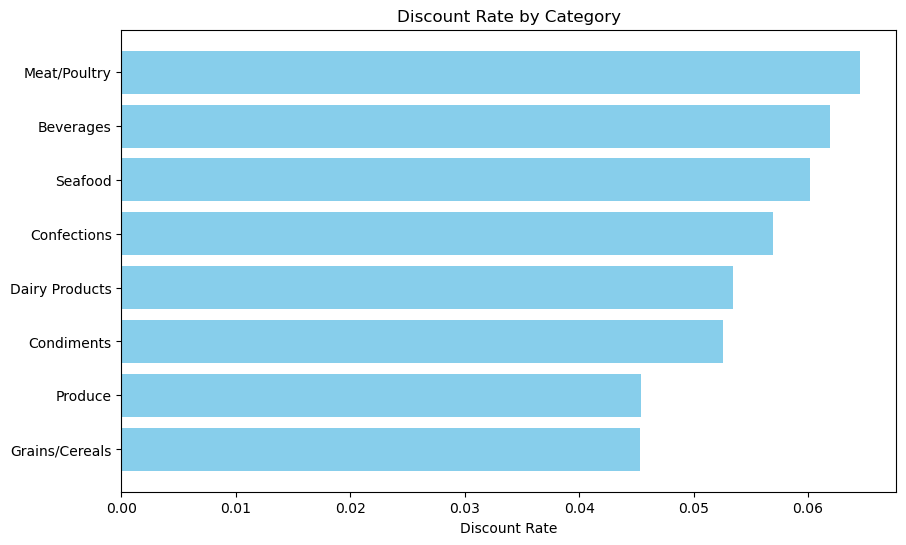

In [291]:
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Meat/Poultry', 'Beverages', 'Seafood', 'Confections', 'Dairy Products', 
              'Condiments', 'Produce', 'Grains/Cereals']
discount_rates = [0.0645, 0.0619, 0.0602, 0.0569, 0.0534, 0.0526, 0.0454, 0.0453]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.barh(categories, discount_rates, color='skyblue')
plt.xlabel('Discount Rate')
plt.title('Discount Rate by Category')
plt.gca().invert_yaxis()  # To display the highest discount rate at the top
plt.show()


# --------------------------

## 5 Inventory Analysis

#### Cost of Goods Sold: Starting Inventory + Purchase - Ending Inventory

# --------------------------

## 6 Trend Analysis

#### 1) Seasonal Sales by Category

In [165]:
sales_df_detail.groupby('ordermonth').sum(numeric_only=True)['sales']

ordermonth
1.0     159079.41
2.0     156197.70
3.0     133384.74
4.0     187130.81
5.0      87159.15
6.0      53190.60
7.0      63599.73
8.0      86190.84
9.0      72763.82
10.0    126448.63
11.0     86139.52
12.0    115729.88
Name: sales, dtype: float64

#### 2) Time-series Sales by Category

In [166]:
sales_df_detail['ordermonth']

0        7.0
1        7.0
2        7.0
3        9.0
4        9.0
        ... 
2150     7.0
2151    10.0
2152     9.0
2153     3.0
2154     3.0
Name: ordermonth, Length: 2155, dtype: float64

In [336]:
sales_df_detail_vis = sales_df_detail.copy()

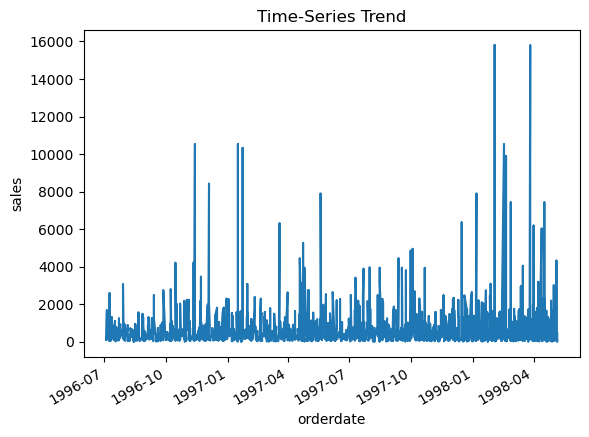

<Figure size 1500x1500 with 0 Axes>

In [337]:
import matplotlib.pyplot as plt
sales_df_detail_vis.set_index('orderdate', inplace=True)
sales_df_detail_vis['sales'].plot()
plt.title('Time-Series Trend')
plt.xlabel('orderdate')
plt.ylabel('sales')
plt.figure(figsize=(15, 15))
plt.show()


#### 3) Top 3 Fastest Growing Categories in 1997

In [415]:
sales_df_detail_1997 = sales_df_detail[(sales_df_detail['orderdate']<'1997-12-31') & (sales_df_detail['orderdate']>'1996-12-31')]

In [466]:
a = [x for x in sales_df_detail_1997['sales']]

In [457]:
min_month = group_data_df['ordermonth'].min()
min_month

1.0

In [493]:
group_data = sales_df_detail_1997.groupby(['categoryname','ordermonth']).sum(numeric_only=True)['sales']
group_data_df = group_data.reset_index() #use reset_index to convert series in dataframe

group_data_df['perchange'] = 0
for index, row in group_data_df.iterrows():
    if index>0:
        prev_sales = group_data_df.loc[index - 1, 'sales']
        current_sales = row['sales']
        if row['ordermonth'] != min_month and prev_sales != 0:
            percen_change = (current_sales-prev_sales)/prev_sales
            group_data_df.loc[index, 'perchange'] = percen_change
            
round(group_data_df.groupby('categoryname').mean()['perchange']*100,2).sort_values(ascending=False).head(3)

categoryname
Meat/Poultry    129.35
Seafood          61.01
Beverages        59.81
Name: perchange, dtype: float64

#### 4) Top 10 Fastest Growing Product Listing in 1997 (by Month change)

In [483]:
group_data_product = sales_df_detail_1997.groupby(['productname','categoryname','ordermonth']).sum(numeric_only=True)['sales']
product_dict1997 = {}
      
for index, value in group_data_product.items():
    productname, categoryname, ordermonth = index  # Unpack the multi-index
    
    if productname not in product_dict1997:
        product_dict1997[productname] = [ordermonth]  # Start a new list with the current ordermonth
    else:
        product_dict1997[productname].append(ordermonth)  # Append the ordermonth to the existing list

In [510]:
group_data_product_df = group_data_product.reset_index()
group_data_product_df['perchange'] = 0
for index, row in group_data_product_df.iterrows():
    if index>0:
        prev_sales = group_data_product_df.loc[index - 1, 'sales']
        current_sales = row['sales']
        if row['ordermonth'] != min_month and prev_sales != 0:
            percen_change = (current_sales-prev_sales)/prev_sales
            group_data_product_df.loc[index, 'perchange'] = percen_change

group_data_product_df
min_indices = group_data_product_df.groupby(['productname'])['ordermonth'].idxmin() # find the index of the minimum 'Ordermonth' across each product
group_data_product_df_dropped = group_data_product_df.drop(min_indices)

In [517]:
group_data_product_df_dropped.groupby(['productname']).mean(numeric_only=True)[['perchange','sales']].sort_values('perchange',ascending=False).head(10)

,perchange,sales
productname,,
Konbu,6.601217,143.760000
Spegesild,6.509654,510.000000
Boston Crab Meat,3.765236,1042.650000
Chartreuse verte,2.931944,807.000000
Escargots de Bourgogne,2.849578,520.062500
Filo Mix,2.682186,260.750000
Pâté chinois,2.571651,838.933333
Louisiana Hot Spiced Okra,2.565476,569.500000
Inlagd Sill,2.387100,1012.428571


# --------------------------

## 7 Correlation Analysis

In [169]:
import matplotlib.pyplot as plt

#### 1) Consumer Behavior - Demand elasticity on Price by category of product (Unitprice vs. quantity)

/var/folders/6y/4k5tlbxx7gddlr_5v_kclgg40000gn/T/ipykernel_1096/3104794181.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])


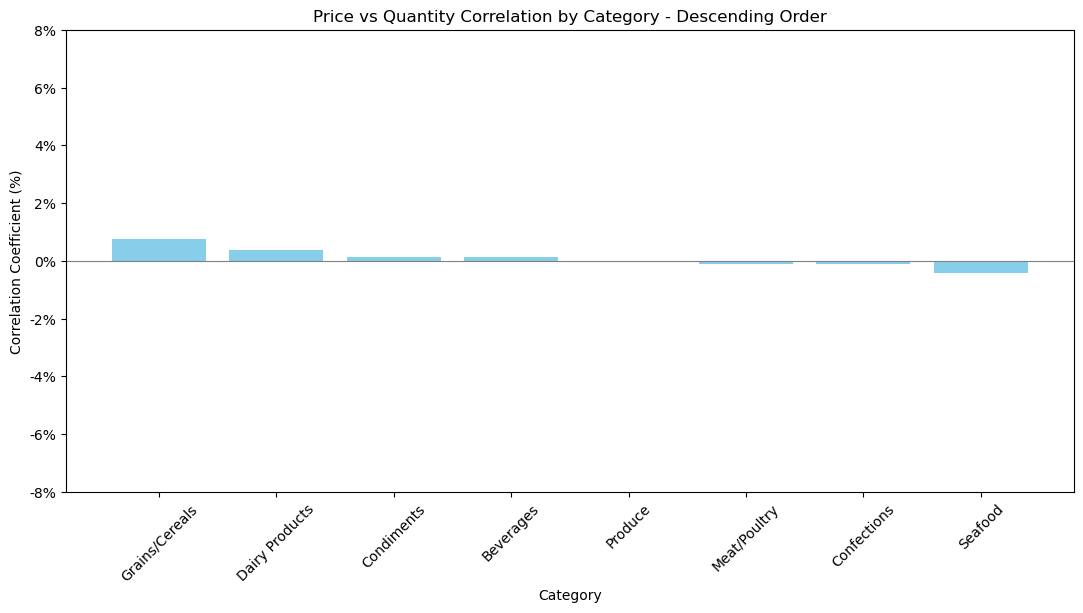

In [170]:
price_quantity_corr = {}
for category, group in sales_df_detail.groupby('categoryname'):
    if 'unitprice_x' in group.columns and 'quantity' in group.columns:
        corr = group[['unitprice_x', 'quantity']].corr().iloc[0, 1]
        price_quantity_corr[category] = corr

# Sorting the correlations in descending order
sorted_categories = sorted(price_quantity_corr, key=price_quantity_corr.get, reverse=True)
sorted_correlations = [price_quantity_corr[category] * 100 for category in sorted_categories]

# Visualization
plt.figure(figsize=(13, 6))
plt.bar(sorted_categories, sorted_correlations, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Correlation Coefficient (%)')
plt.title('Price vs Quantity Correlation by Category - Descending Order')

# Customizing y-axis to show '%' sign
plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])

plt.ylim(-100, 100)
plt.axhline(0, color='grey', lw=0.8)
plt.xticks(rotation=45)  # Rotating category labels for better visibility

plt.show()

### 2) Consumer Behavior - Demand elasticity on discount by category of products (Discount vs. quantity)

Discount vs Quantity Correlation by Category:
 {'Beverages': 0.11680799918706457, 'Condiments': 0.1671995434790282, 'Confections': 0.06614240562866909, 'Dairy Products': 0.19607791757086243, 'Grains/Cereals': 0.05130801710528019, 'Meat/Poultry': 0.20794934882489788, 'Produce': 0.05435273063563732, 'Seafood': 0.12375882149302633}


/var/folders/6y/4k5tlbxx7gddlr_5v_kclgg40000gn/T/ipykernel_1096/587346669.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])


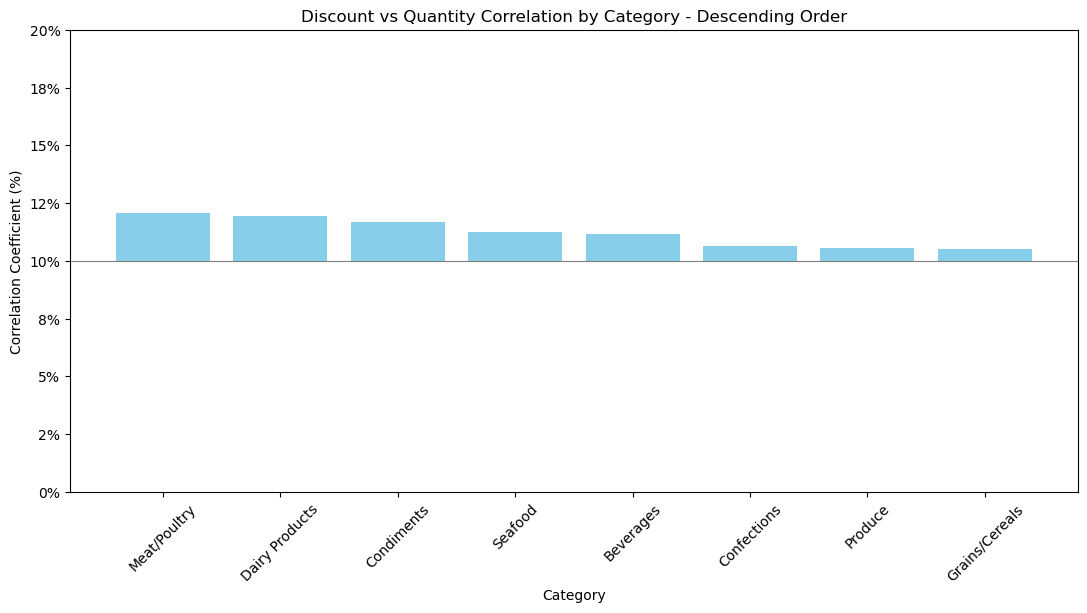

In [171]:
discount_quantity_corr = {}
for category, group in sales_df_detail.groupby('categoryname'):
    if 'discount' in group and 'quantity' in group:
        corr = group[['discount', 'quantity']].corr().iloc[0, 1]
        discount_quantity_corr[category] = corr

print("Discount vs Quantity Correlation by Category:\n", discount_quantity_corr)
# Calculation of discount vs quantity correlation by category
discount_quantity_corr = {}
for category, group in sales_df_detail.groupby('categoryname'):
    if 'discount' in group.columns and 'quantity' in group.columns:
        corr = group[['discount', 'quantity']].corr().iloc[0, 1]
        discount_quantity_corr[category] = corr

# Sorting the correlations in descending order
sorted_categories = sorted(discount_quantity_corr, key=discount_quantity_corr.get, reverse=True)
sorted_correlations = [discount_quantity_corr[category] * 100 for category in sorted_categories]

# Visualization
plt.figure(figsize=(13, 6))
plt.bar(sorted_categories, sorted_correlations, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Correlation Coefficient (%)')
plt.title('Discount vs Quantity Correlation by Category - Descending Order')

# Customizing y-axis to show '%' sign
plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])

plt.ylim(-100, 100)
plt.axhline(0, color='grey', lw=0.8)
plt.xticks(rotation=45)  # Rotating category labels for better visibility

plt.show()

### 3) Marketing Strategy - Promotion performance (Sales vs. discount) and Incremental Sales % by Category

/var/folders/6y/4k5tlbxx7gddlr_5v_kclgg40000gn/T/ipykernel_1096/2151361575.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])


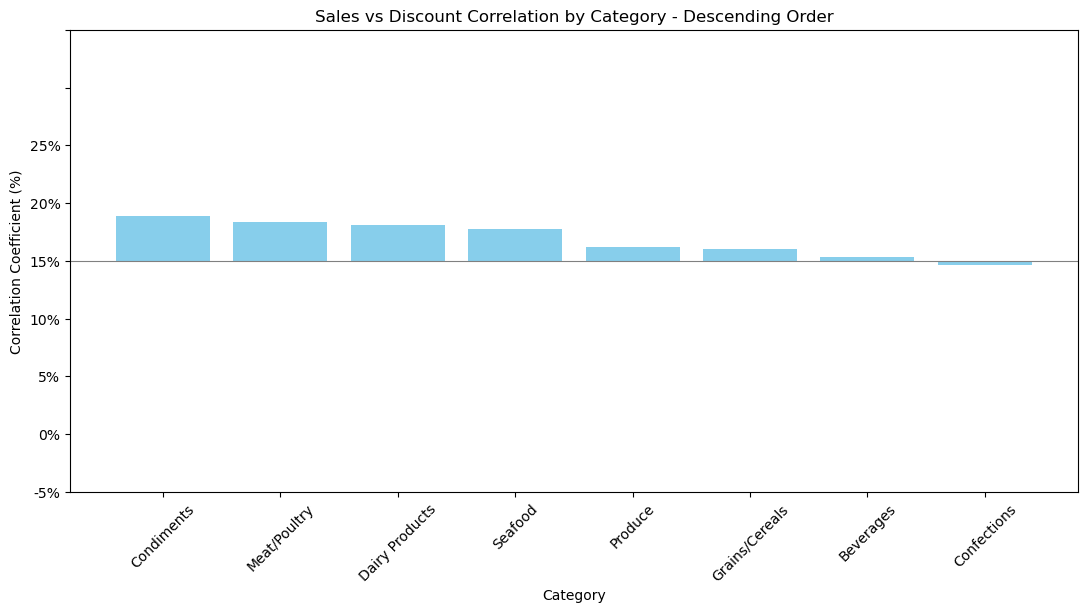

In [295]:
import matplotlib.pyplot as plt

# Calculation of Sales vs Discount correlation by category
sales_discount_corr = {}
for category, group in sales_df_detail.groupby('categoryname'):
    if 'Sales' in group.columns and 'discount' in group.columns:
        corr = group[['Sales', 'discount']].corr().iloc[0, 1]  # Calculating the correlation
        sales_discount_corr[category] = corr

# Sorting the correlations in descending order
sorted_categories = sorted(sales_discount_corr, key=sales_discount_corr.get, reverse=True)
sorted_correlations = [sales_discount_corr[category] * 100 for category in sorted_categories]

# Visualization
plt.figure(figsize=(13, 6))
plt.bar(sorted_categories, sorted_correlations, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Correlation Coefficient (%)')
plt.title('Sales vs Discount Correlation by Category - Descending Order')

# Customizing y-axis to show '%' sign
plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])

plt.ylim(-100, 100)
plt.axhline(0, color='grey', lw=0.8)
plt.xticks(rotation=45)  # Rotating category labels for better visibility

plt.show()

In [172]:
inventory_corr_factors = {}
factors = ['sales', 'discount', 'quantity'] 

for factor in factors:
    corr_dict = {}
    for category, group in sales_df_detail.groupby('categoryname'):
        if factor in group and 'unitsinstock' in group:
            corr = group[[factor, 'unitsinstock']].corr().iloc[0, 1]
            corr_dict[category] = corr
    inventory_corr_factors[factor] = corr_dict

print("Units in Stock Correlation by Factor and Category:\n", inventory_corr_factors)

Units in Stock Correlation by Factor and Category:
 {'sales': {'Beverages': -0.17127609789265819, 'Condiments': 0.022435526981833716, 'Confections': 0.0608322245365064, 'Dairy Products': 0.10344278819194139, 'Grains/Cereals': -0.20711696447464295, 'Meat/Poultry': -0.20524782981320663, 'Produce': 0.001926460331444028, 'Seafood': -0.08994714363715815}, 'discount': {'Beverages': -0.049817911846847376, 'Condiments': 0.02644745480264656, 'Confections': 0.034385905671414564, 'Dairy Products': -0.042149239528067727, 'Grains/Cereals': -0.11880912394282156, 'Meat/Poultry': 0.08942976415488814, 'Produce': 0.08215956422953088, 'Seafood': -0.025344309397811196}, 'quantity': {'Beverages': 0.0570009589218144, 'Condiments': -0.03910583607709124, 'Confections': -0.039486330444641074, 'Dairy Products': 0.00945089932252204, 'Grains/Cereals': 0.024603142215684052, 'Meat/Poultry': 0.050658283495421806, 'Produce': -0.11724058303074304, 'Seafood': 0.03136879752833904}}


### 4) Pricing Strategy - Would price being adjusted based on the change of quantity? (Quantity vs pricing)

/var/folders/6y/4k5tlbxx7gddlr_5v_kclgg40000gn/T/ipykernel_1096/1303969019.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])


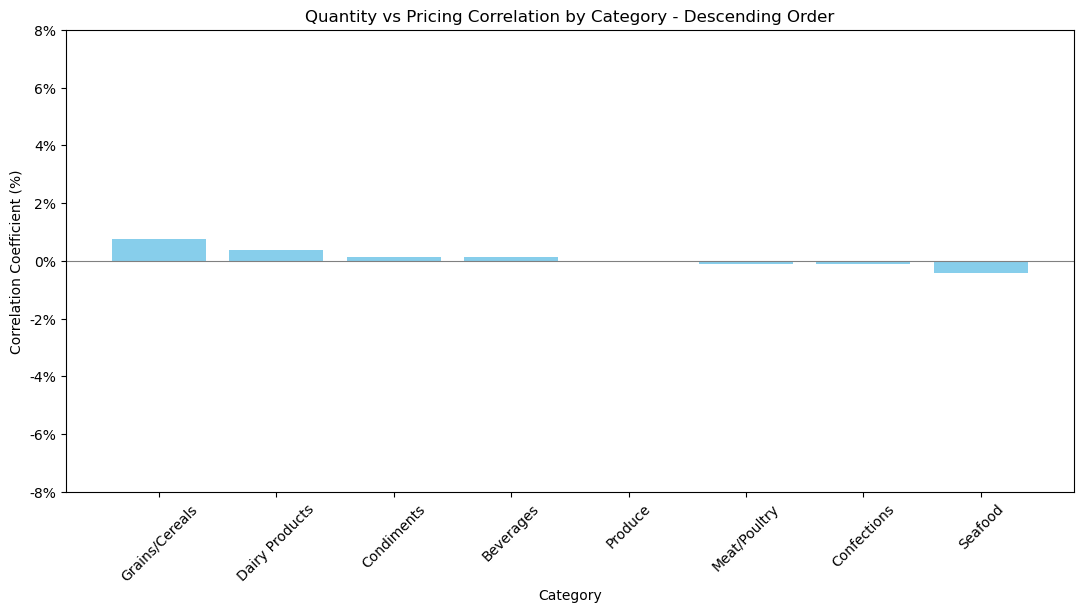

In [296]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming sales_df_detail contains 'categoryname', 'quantity', and 'unitprice_x'
# Calculation of quantity vs unitprice_x correlation by category
quantity_price_corr = {}
for category, group in sales_df_detail.groupby('categoryname'):
    if 'quantity' in group.columns and 'unitprice_x' in group.columns:
        corr = group[['quantity', 'unitprice_x']].corr().iloc[0, 1]
        quantity_price_corr[category] = corr

# Sorting the correlations in descending order
sorted_categories = sorted(quantity_price_corr, key=quantity_price_corr.get, reverse=True)
sorted_correlations = [quantity_price_corr[category] * 100 for category in sorted_categories]

# Visualization
plt.figure(figsize=(13, 6))
plt.bar(sorted_categories, sorted_correlations, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Correlation Coefficient (%)')
plt.title('Quantity vs Pricing Correlation by Category - Descending Order')

# Customizing y-axis to show '%' sign
plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])

plt.ylim(-100, 100)
plt.axhline(0, color='grey', lw=0.8)
plt.xticks(rotation=45)  # Rotating category labels for better visibility

plt.show()

# --------------------------

## 7 Discontinued Product

#### Discountinued Items***

In [173]:
round(sales_df_detail['discontinued'].sum(),2)

310

In [174]:
round(sales_df_detail.groupby(['categoryid','categoryname']).sum(numeric_only=True)['discontinued'].sort_values(ascending=False),2)

categoryid  categoryname  
1           Beverages         133
6           Meat/Poultry      104
7           Produce            33
5           Grains/Cereals     30
2           Condiments         10
3           Confections         0
4           Dairy Products      0
8           Seafood             0
Name: discontinued, dtype: int64

In [175]:
sales_df_detail['productid'].size

2155

In [176]:
test_3 = round(sales_df_detail.groupby(['categoryid','categoryname']).count()['orderid'],2)
test_val = []
for x in test_3:
    test_val.append(x)
sum(test_val)

2155

### Discontinued Product (by id) % 

In [177]:
discontinuedgroup = round(sales_df_detail.groupby(['categoryid','categoryname']).sum(numeric_only=True)['discontinued'],2)/round(sales_df_detail.groupby(['categoryid','categoryname']).count()['orderid'],2)
round(discontinuedgroup.sort_values(ascending=False),2)

categoryid  categoryname  
6           Meat/Poultry      0.60
1           Beverages         0.33
7           Produce           0.24
5           Grains/Cereals    0.15
2           Condiments        0.05
3           Confections       0.00
4           Dairy Products    0.00
8           Seafood           0.00
dtype: float64

### Discontinued Items with Sales

In [224]:
Discontinued_rank = sales_df_detail.groupby(['categoryid','categoryname']).sum(numeric_only=True)
Discontinued_product = sales_df_detail[sales_df_detail['discontinued'] == 1]
Continued_product = sales_df_detail[sales_df_detail['discontinued'] == 0]
Discontinued_product.groupby(['categoryid','categoryname']).mean(numeric_only=True)['Sales'].sort_values(ascending=False)

categoryid  categoryname  
6           Meat/Poultry      1476.498077
7           Produce            814.109091
2           Condiments         580.115000
5           Grains/Cereals     311.080000
1           Beverages          282.852632
Name: Sales, dtype: float64

In [225]:
Continued_product.groupby(['categoryid','categoryname']).mean(numeric_only=True)['Sales'].sort_values(ascending=False)

categoryid  categoryname  
1           Beverages         918.478044
7           Produce           761.194175
4           Dairy Products    686.695355
5           Grains/Cereals    550.568675
3           Confections       530.236826
2           Condiments        523.755340
8           Seafood           429.160879
6           Meat/Poultry      357.000000
Name: Sales, dtype: float64

### Discontinued Items with Quantity

In [269]:
Discontinued_product.groupby(['categoryid','categoryname']).mean(numeric_only=True)['quantity'].sort_values(ascending=False)

categoryid  categoryname  
2           Condiments        29.800000
6           Meat/Poultry      24.432692
5           Grains/Cereals    23.233333
1           Beverages         22.631579
7           Produce           19.393939
Name: quantity, dtype: float64

In [270]:
Continued_product.groupby(['categoryid','categoryname']).mean(numeric_only=True)['quantity'].sort_values(ascending=False)

categoryid  categoryname  
4           Dairy Products    24.997268
2           Condiments        24.271845
1           Beverages         24.066421
6           Meat/Poultry      24.028986
3           Confections       23.670659
5           Grains/Cereals    23.283133
8           Seafood           23.275758
7           Produce           22.815534
Name: quantity, dtype: float64

### For Address Q2: Measure products do not sell well in quantity terms and compare it with average quantity by category

In [271]:
sales_df_detail.groupby('categoryname').mean(numeric_only=True)['quantity']

categoryname
Beverages         23.594059
Condiments        24.527778
Confections       23.670659
Dairy Products    24.997268
Grains/Cereals    23.275510
Meat/Poultry      24.271676
Produce           21.985294
Seafood           23.275758
Name: quantity, dtype: float64

In [272]:
Cate_quant = {
'Beverages':        23.594059,
'Condiments':       24.527778,
'Confections':       23.670659,
'Dairy Products':   24.997268,
'Grains/Cereals':  23.275510,
'Meat/Poultry':      24.271676,
'Produce':           21.985294,
'Seafood':          23.275758 }

sales_df_detail['quant_avg'] = sales_df_detail['categoryname'].map(Cate_quant)

In [273]:
Discontinued_product_selected = Discontinued_product[Discontinued_product['quantity'] < Discontinued_product['quant_avg']]
A = Discontinued_product_selected.groupby(['productid','productname']).mean(numeric_only=True)['Sales']
A

productid  productname                  
1          Chai                              192.960000
2          Chang                             244.607407
5          Chef Anton's Gumbo Mix            275.330000
9          Mishi Kobe Niku                   994.250000
17         Alice Mutton                      453.142857
24         Guaraná Fantástica                 53.470588
28         Rössle Sauerkraut                 506.133333
29         Thüringer Rostbratwurst          1608.018261
42         Singaporean Hokkien Fried Mee     146.258824
53         Perth Pasties                     347.470000
Name: Sales, dtype: float64

In [274]:
B = sales_df_detail.groupby(['productid','productname']).mean(numeric_only=True)['Sales']
B

productid  productname                    
1          Chai                               375.726316
2          Chang                              421.800000
3          Aniseed Syrup                      256.666667
4          Chef Anton's Cajun Seasoning       471.240000
5          Chef Anton's Gumbo Mix             580.115000
                                                 ...    
73         Röd Kaviar                         300.000000
74         Longlife Tofu                      197.384615
75         Rhönbräu Klosterbier               188.055435
76         Lakkalikööri                       430.615385
77         Original Frankfurter grüne Soße    254.868421
Name: Sales, Length: 77, dtype: float64

In [275]:
find_dict = {

1 :  192.960000,
2       :                      244.607407,
5      :         275.330000,
9     :             994.250000,
17   :                    453.142857,
24   :              53.470588,
28   :            506.133333,
29  :       1608.018261,
42  :    146.258824,
53  :              347.470000}

In [268]:
B_aligned = B.reindex(A.index)
valid_comparison = (A > B_aligned) & (A.notna() & B_aligned.notna())
count_higher_sales_in_A = valid_comparison.sum()
count_higher_sales_in_A

0

In [ ]:
Continued_product.groupby(['categoryid','categoryname']).mean(numeric_only=True)['quantity'].sort_values(ascending=False)

In [294]:
Discontinued_rank = sales_df_detail.groupby(['categoryid','categoryname']).sum(numeric_only=True)
Discontinued_product = sales_df_detail[sales_df_detail['discontinued'] == 1]
Continued_product = sales_df_detail[sales_df_detail['discontinued'] == 0]
Discontinued_product.groupby(['categoryid','categoryname']).mean(numeric_only=True)['Sales'].sort_values(ascending=False)
sales_df_detail.groupby('categoryname').mean(numeric_only=True)['quantity']
Cate_quant = {
'Beverages':        23.594059,
'Condiments':       24.527778,
'Confections':       23.670659,
'Dairy Products':   24.997268,
'Grains/Cereals':  23.275510,
'Meat/Poultry':      24.271676,
'Produce':           21.985294,
'Seafood':          23.275758 }

sales_df_detail['quant_avg'] = sales_df_detail['categoryname'].map(Cate_quant)
B = sales_df_detail.groupby(['productid','productname']).mean(numeric_only=True)['Sales']
B
B_aligned = B.reindex(A.index)
valid_comparison = (A > B_aligned) & (A.notna() & B_aligned.notna())
count_higher_sales_in_A = valid_comparison.sum()
count_higher_sales_in_A


0